# Set Up

In [1]:
#command line items
%load_ext autoreload
%autoreload 2

#python imports
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage.filters import gaussian_filter
from astropy.cosmology import FlatLambdaCDM
from copy import copy
from numpy import nan


from pylab import *
import astropy.io.fits as fits
from scipy.io import readsav
from matplotlib.colors import LogNorm
from astropy.visualization import (ZScaleInterval, ImageNormalize)
import matplotlib.patches as patches
#from plot_grids import *
import scipy.integrate as integrate

Red = '\033[91m'
Green = '\033[92m'
Blue = '\033[94m'
Cyan = '\033[96m'
Yellow = '\033[93m'
Magenta = '\033[95m'
CEND = '\033[0m'

/tmp/ipykernel_17561/989343433.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


# Calculate Scales

In [2]:
# [OII] and MgII wavelenght
o2 = [3726.03, 3728.82]
mg2 = [2795.5301, 2802.7056]

#Redshift of the source
z = 0.043118

#check that the python library gives the same result as the  manual calculation
cosmo = FlatLambdaCDM(H0=67.4, Om0=0.315, Tcmb0=2.725)
arcsec_kpc = cosmo.arcsec_per_kpc_proper(z) 
deg_kpc = arcsec_kpc / 60. /60. # degree size of 1 kpc

print(Green + 'Check using FlatLambdaCDM, scale:' + CEND, arcsec_kpc, 1/arcsec_kpc)

#Set some constants
h0 = 67.4
Om = 0.315
Ol = 1 - Om
c_light = 299792.458

#Estimate the Angular Diameter Distance 
def func(x):
    return 1/np.sqrt( Om * (1+x)**3 + Ol)

result = integrate.quad(lambda x: func(x), 0, z)
da = c_light/h0*1/(1+z)* (result[0])
print(Red + 'Angular Diameter Distance is' + CEND, da, Red + 'Mpc' + CEND)

# 4.84814e-6 is rad in arcsec, 1000 is to have the scale in kpc
x = da * 1000 * 4.84814e-6

# 8.096e-5 is the pixel scale along slice, 3600 is to convert it in arcsec (0.291456)
pixel_size = 8.096e-5 * 3600
pixel_scale = x * pixel_size


arcsec_pixel =  pixel_scale / x

print (Blue + "Scale: 1 arcsec is" + CEND, x, Blue + "kpc" + CEND)
print (Magenta + "Scale: 1 pixel is" + CEND, pixel_scale, Magenta + "kpc" + CEND)
print (Cyan + "FOV for z" + CEND, z, Cyan + "is" + CEND, 16.5 * x, 'x', 20.4 * x, Cyan + "kpc" + CEND,)
print (Yellow + "Scale: 1 pixel is" + CEND, arcsec_pixel, Yellow + "arcsec" + CEND)


Check using FlatLambdaCDM, scale: 1.1335033945669866 arcsec / kpc 0.8822205604262997 kpc / arcsec
Angular Diameter Distance is 181.9717830858933 Mpc
Scale: 1 arcsec is 0.8822246804500427 kpc
Scale: 1 pixel is 0.25712967646524765 kpc
FOV for z 0.043118 is 14.556707227425704 x 17.99738348118087 kpc
Scale: 1 pixel is 0.291456 arcsec


# Read Files 1 component fit

In [3]:
data_1comp = readsav('/home/acoil/AGN_outflows_ifsfit/F05189/iter3/F05189.xdr')
data_arr_1comp = data_1comp['windstr']

lin_data_1comp = readsav('/home/acoil/AGN_outflows_ifsfit/F05189/iter3/F05189.lin.xdr')
print(lin_data_1comp.keys())

dict_keys(['emlwav', 'emlwaverr', 'emlsig', 'emlsigerr', 'emlweq', 'emlflx', 'emlflxerr', 'emlcvdf', 'emlpcor'])


# Load Arrays 1 component fit

In [4]:
data_flx_1comp = lin_data_1comp['emlflx'][0][8]
data_flx_err_1comp = lin_data_1comp['emlflxerr'][0][8]
vel_arr_1comp = data_arr_1comp['E_VEL'][0][0][8]

print('###### FLUX AND ERR #########') 
for i in range(len(data_flx_1comp)):
    if data_flx_1comp[i][0] != None:
        print(i,data_flx_1comp[i][0])
            
print('####### VEL ########')        
for i in range(len(vel_arr_1comp)):
    if vel_arr_1comp[i][0] != None:
        print(i,vel_arr_1comp[i][0])        

###### FLUX AND ERR #########
0 b'ftot'
5 b'fc1'
6 b'fc1pk'
####### VEL ########
0 b'v%84c1'
4 b'v%02c1'
5 b'v%50c1'
8 b'vsigc1'
9 b'v%98'
11 b'v%16'
14 b'vpk'
15 b'v%50'
16 b'vsig'
17 b'v%02'
19 b'vsigc1err'
24 b'v%50c1err'
27 b'v%84'
28 b'v%98c1'
31 b'v%16c1'


# Read Files 2 components fit

In [5]:
data = readsav('/raid/KCWI/AGN_outflows/F05189/iter2/F05189.xdr')
data_arr = data['windstr']

lin_data = readsav('/raid/KCWI/AGN_outflows/F05189/iter2/F05189.lin.xdr')
print(lin_data.keys())

dict_keys(['emlwav', 'emlwaverr', 'emlsig', 'emlsigerr', 'emlweq', 'emlflx', 'emlflxerr', 'emlcvdf', 'emlpcor'])


# Load Arrays 2 components fit

In [6]:
data_flx = lin_data['emlflx'][0][8]
data_flx_err = lin_data['emlflxerr'][0][8]
vel_arr = data_arr['E_VEL'][0][0][8]

print('###### FLUX AND ERR #########') 
for i in range(len(data_flx)):
    if data_flx[i][0] != None:
        print(i,data_flx[i][0])
            
print('####### VEL ########')        
for i in range(len(vel_arr)):
    if vel_arr[i][0] != None:
        print(i,vel_arr[i][0])        

###### FLUX AND ERR #########
0 b'ftot'
1 b'fc2'
4 b'fc2pk'
5 b'fc1'
6 b'fc1pk'
####### VEL ########
0 b'v%84c1'
4 b'v%02c1'
5 b'v%50c1'
8 b'v%98c2'
9 b'v%98'
10 b'vsigc1'
11 b'v%16'
12 b'vsigc2'
13 b'v%84c2'
14 b'vpk'
15 b'v%50'
16 b'vsig'
17 b'v%02'
18 b'v%50c2'
19 b'v%50c2err'
20 b'vsigc2err'
21 b'v%02c2'
22 b'vsigc1err'
24 b'v%16c2'
25 b'v%50c1err'
27 b'v%84'
28 b'v%98c1'
31 b'v%16c1'


# Total Flux 2 components fit

In [7]:
ftot = data_flx[0][1][0][8]
err_ftot = data_flx_err[0][1][0][8]

print('####### LINES ########') 
for i in range(len(ftot)):
    if ftot[i][0] != None:
        print(i,ftot[i][0])

####### LINES ########
0 b'Hbeta'
4 b'[OII]3726'
5 b'[OII]3726+[OII]3729'
9 b'[NeIII]3869'
12 b'[OII]3729'
13 b'[OIII]5007'
14 b'[OIII]4959'
15 b'Hgamma'


# Functions to get data for maps

In [3]:
err_tresh = 0.0022 #update this after investigating error histogram

def set_sn(arr, arr2):
    sn_cut = np.where(arr < 4) #change here the SN threshold, now set to 3
    arr2[sn_cut] = nan   
    return arr2

def set_bad(arr):
    bad = (arr > 1e90)   
    arr[bad] = nan   
    return arr   

def set_bad_err(arr):
    bad = (arr > 1e90)   
    arr[bad] = nan 
    bad2 = arr < 1e-13
    arr[bad2]=nan
    return arr 

def get_flux_uncorr(idx, arr, arr2):
    f = copy(arr[idx][1])
    f_err = copy(arr2[idx][1])
    
    f = set_bad(f)
    f_err = set_bad(f_err)  

    for row in range(f_err.shape[0]):
        for column in range(f_err.shape[1]):
            if(f_err[row][column] < err_tresh):
                f_err[row][column] = err_tresh
        
    sn = f/f_err
    f = set_sn(sn,f)  
    return f

def get_err_flux(idx, arr): # Use this only to decide what's the error threshold
    f_err = copy(arr[idx][1])
    f_err = set_bad_err(f_err)  
    
    return f_err

    
def get_v50(idx, arr, arr2, arr3):
    f = copy(arr[idx][1])
    f_err = copy(arr2[idx][1])

    f = set_bad(f)
    f_err = set_bad(f_err)
    
    for row in range(f_err.shape[0]):
        for column in range(f_err.shape[1]):
            if(f_err[row][column] < err_tresh):
                f_err[row][column] = err_tresh
    
    sn = f/f_err  
    v = copy(arr3[idx][1])
    v = set_bad(v)
    v = set_sn(sn,v)
    return v 

def get_vsig(idx, arr, arr2, arr3):
    f = copy(arr[idx][1])
    f_err = copy(arr2[idx][1])
    
    f = set_bad(f)
    f_err = set_bad(f_err)
    
    for row in range(f_err.shape[0]):
        for column in range(f_err.shape[1]):
            if(f_err[row][column] < err_tresh):
                f_err[row][column] = err_tresh
    
    sn = f/f_err  
    v = copy(arr3[idx][1])
    v = set_bad(v)
    v = set_sn(sn,v)
    return v

def get_v02(idx, arr, arr2, arr3):
    f = copy(arr[idx][1])
    f_err = copy(arr2[idx][1])
    
    f = set_bad(f)
    f_err = set_bad(f_err)
    
    for row in range(f_err.shape[0]):
        for column in range(f_err.shape[1]):
            if(f_err[row][column] < err_tresh):
                f_err[row][column] = err_tresh
    
    sn = f/f_err  
    v = copy(arr3[idx][1])
    v = set_bad(v)
    v = set_sn(sn,v)
    return v

def get_v98(idx, arr, arr2, arr3):
    f = copy(arr[idx][1])
    f_err = copy(arr2[idx][1])
    
    f = set_bad(f)
    f_err = set_bad(f_err)
    
    for row in range(f_err.shape[0]):
        for column in range(f_err.shape[1]):
            if(f_err[row][column] < err_tresh):
                f_err[row][column] = err_tresh
    
    sn = f/f_err  
    v = copy(arr3[idx][1])
    v = set_bad(v)
    v = set_sn(sn,v)
    return v

def get_sn(idx, arr, arr2):
    f = copy(arr[idx][1])
    f_err = copy(arr2[idx][1])
    
    f = set_bad(f)
    f_err = set_bad(f_err)
    
    for row in range(f_err.shape[0]):
        for column in range(f_err.shape[1]):
            if(f_err[row][column] < err_tresh):
                f_err[row][column] = err_tresh
    
    sn = f/f_err  
    sn_cut = np.where(sn < 3) #change here the SN threshold, now set to 3
    sn[sn_cut] = nan 
    return sn

# Functions to plot kinematics maps

In [4]:
def plot_kin(idx, f_temp, err_f_temp, v50_temp, vsig_temp, v02_temp, v98_temp, spx_x=None, spx_y=None, width=None, height=None, spx=False, rec= False):
    figure(figsize=(5,5))
    
    v50_line = get_v50(idx, f_temp, err_f_temp, v50_temp)
    vsig_line = get_vsig(idx, f_temp, err_f_temp, vsig_temp)
    v02_line = get_v02(idx, f_temp, err_f_temp, v02_temp)
    v98_line = get_v98(idx, f_temp, err_f_temp, v98_temp)
       
    subplot(221)
    imshow(v50_line, origin='lower', cmap='RdBu_r', vmin=-200, vmax=300, interpolation='none')
    ax = gca()
    colorbar()
    ax.title.set_text('$v_{50}\ \mathrm{(km\ s^{-1})}$')
    if spx == True:
        plt.plot(spx_x, spx_y, marker="x", markersize=5, markeredgecolor="magenta", markerfacecolor="magenta")
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect) 
        
    subplot(222)
    imshow(vsig_line, origin='lower', cmap='jet', vmin=-250, interpolation='none')
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)     
    ax.title.set_text('$\sigma\ \mathrm{(km\ s^{-1})}$')

    subplot(223)
    imshow(v02_line, origin='lower', cmap='Reds', vmin=-600, vmax=600, interpolation='none')
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)     
    ax.title.set_text('$v_{02}\ \mathrm{(km\ s^{-1})}$')

    subplot(224)
    imshow(v98_line, origin='lower', cmap='Blues_r', vmin=-400, vmax=600, interpolation='none')
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)     
    ax.title.set_text('$v_{98}\ \mathrm{(km\ s^{-1})}$')

    tight_layout()

def plot_kin_c2(idx, f_temp, err_f_temp, v50_temp, vsig_temp, v02_temp, v98_temp, spx_x=None, spx_y=None, width=None, height=None, spx=False, rec= False):
    figure(figsize=(5,5))
    
    v50_line = get_v50(idx, f_temp, err_f_temp, v50_temp)
    vsig_line = get_vsig(idx, f_temp, err_f_temp, vsig_temp)
    v02_line = get_v02(idx, f_temp, err_f_temp, v02_temp)
    v98_line = get_v98(idx, f_temp, err_f_temp, v98_temp)
          
    subplot(221)
    imshow(v50_line, origin='lower', cmap='RdBu_r', vmin=-800, vmax=600, interpolation='none')
    if spx == True:
        plt.plot(spx_x, spx_y, marker="x", markersize=5, markeredgecolor="magenta", markerfacecolor="magenta")
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)    
    ax.title.set_text('$v_{50}\ \mathrm{(km\ s^{-1})}$')

    subplot(222)
    imshow(vsig_line, origin='lower', cmap='jet', vmin=-250, interpolation='none')
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)       
    ax.title.set_text('$\sigma\ \mathrm{(km\ s^{-1})}$')
    
    subplot(223)
    imshow(v02_line, origin='lower', cmap='Reds', vmin=-600, vmax=1500, interpolation='none') 
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)       
    ax.title.set_text('$v_{02}\ \mathrm{(km\ s^{-1})}$')

    subplot(224)
    imshow(v98_line, origin='lower', cmap='Blues_r', vmin=-2000, vmax=600, interpolation='none')    
    ax = gca()
    colorbar()
    if rec == True:
        rect = patches.Rectangle((spx_x, spx_y), width, height, linewidth=1, edgecolor='magenta', facecolor='none')
        ax.add_patch(rect)    
    ax.title.set_text('$v_{98}\ \mathrm{(km\ s^{-1})}$')

    tight_layout()

    

# 1 Component Fit

In [10]:
fc_1comp = data_flx_1comp[0][1][0][8]
err_fc_1comp = data_flx_err_1comp[0][1][0][8]

vsig_1comp = vel_arr_1comp[16][1][0][8]
v50_1comp = vel_arr_1comp[15][1][0][8]
v98_1comp = vel_arr_1comp[9][1][0][8]
v02_1comp = vel_arr_1comp[17][1][0][8]

snr_1comp = get_sn(5,fc_1comp,err_fc_1comp)

# First Component 2 components Fit

In [11]:
fc1 = data_flx[5][1][0][8]
err_fc1 = data_flx_err[5][1][0][8]

vsig_c1 = vel_arr[10][1][0][8]
v50_c1 = vel_arr[5][1][0][8]
v98_c1 = vel_arr[28][1][0][8]
v02_c1 = vel_arr[4][1][0][8]

snr_c1 = get_sn(5,fc1,err_fc1)

# Second Component 2 components Fit

In [12]:
fc2 = data_flx[1][1][0][8]
err_fc2 = data_flx_err[1][1][0][8]

vsig_c2 = vel_arr[12][1][0][8]
v50_c2 = vel_arr[18][1][0][8]
v98_c2 = vel_arr[8][1][0][8]
v02_c2 = vel_arr[21][1][0][8]

snr_c2 = get_sn(5,fc2,err_fc2)

# Error Map and Histogram

In [5]:
def err_map(idx, arr, title = None, kpc=False, arcsec=False):
    figure(figsize=(4,4))
    ax=subplot(111)
    o2_err = get_err_flux(idx, arr) 

    im = ax.imshow(o2_err, origin='lower', cmap='viridis', norm=LogNorm())
    colorbar(im)
    ax.title.set_text(title)
    
    x_tick = (17, 37, 57)
    ax.set_xticks(x_tick)
    y_tick = (27, 47, 67)
    ax.set_yticks(y_tick)    
    
    if kpc == True:
        x_labels = np.round(np.array([-20, 0 , 20])*pixel_scale,1)
        ax.set_xticklabels(x_labels,size=10)
        y_labels = np.round(np.array([-20, 0 , 20])*pixel_scale,1)
        ax.set_yticklabels(y_labels,size=10)
        #plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
        ax.set_xlabel(r'kpc',fontsize=11)
        ax.set_ylabel(r'kpc',fontsize=11)
    if arcsec == True:
        x_labels = np.round(np.array([-20, 0 , 20])*arcsec_pixel,1)
        ax.set_xticklabels(x_labels,size=10)
        y_labels= np.round(np.array([-20, 0 , 20])*arcsec_pixel,1)
        ax.set_yticklabels(y_labels,size=10)
        #plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
        ax.set_xlabel(r'arcsec',fontsize=11)
        ax.set_ylabel(r'arcsec',fontsize=11)
    return o2_err    

In [14]:
##### 1comp ##### 

%matplotlib notebook
o2_err = err_map(5,err_fc_1comp, '[OII]3726,9 Flux Error', kpc=True) #Error map to evaluate error threshold, no cuts
savefig('o2_error_1comp.pdf')
#CHANGE to err_fc_1comp for 1 component fit

<IPython.core.display.Javascript object>

In [15]:
%matplotlib notebook

figure(figsize=(4,4))
ax = subplot(111)
plt.xlim(0,0.03)

index = np.where(o2_err < 0.03)
newlist_2 = o2_err[index]

ax.hist(newlist_2,bins=1000)
ax.axvline( x = 0.0022, c='orange', lw=1, ls='-')

print(np.min(newlist_2), np.max(newlist_2))
savefig('o2_errorhist_1comp.pdf')

<IPython.core.display.Javascript object>

0.0011497023030039427 0.027532251196114556


In [19]:
##### 2comp fc1 ##### 

%matplotlib notebook
o2_err_fc1 = err_map(5,err_fc1, '[OII]3726,9 Flux Error', kpc=True) #Error map to evaluate error threshold, no cuts
savefig('o2_error_fc1.pdf')


<IPython.core.display.Javascript object>

In [22]:
%matplotlib notebook

figure(figsize=(4,4))
ax = subplot(111)
plt.xlim(0,0.03)

index = np.where(o2_err_fc1 < 0.03)
newlist_2 = o2_err_fc1[index]

ax.hist(newlist_2,bins=1000)
ax.axvline( x = 0.0026, c='orange', lw=1, ls='-')

print(np.min(newlist_2), np.max(newlist_2))
savefig('o2_errorhist_fc1.pdf')

<IPython.core.display.Javascript object>

0.0010920810134718375 0.029878893313941772


In [17]:
##### 2comp fc2 ##### 

%matplotlib notebook
o2_err_fc2 = err_map(5,err_fc2, '[OII]3726,9 Flux Error', kpc=True) #Error map to evaluate error threshold, no cuts
savefig('o2_error_fc2.pdf')


<IPython.core.display.Javascript object>

In [18]:
%matplotlib notebook

figure(figsize=(4,4))
ax = subplot(111)
plt.xlim(0,0.03)

index = np.where(o2_err_fc2 < 0.03)
newlist_2 = o2_err_fc2[index]

ax.hist(newlist_2,bins=1000)
ax.axvline( x = 0.0022, c='orange', lw=1, ls='-')

print(np.min(newlist_2), np.max(newlist_2))
savefig('o2_errorhist_fc2.pdf')

<IPython.core.display.Javascript object>

0.0010763964805341258 0.028877632421882658


# Error hist from FITS

In [ ]:
#### 2comp fc2 from FITS ####

%matplotlib notebook
o2_err_fc2 = err_map(5,err_fc2, '[OII]3726,9 Flux Error', kpc=True) #Error map to evaluate error threshold, no cuts
savefig('o2_error_fc2_fromFITS.pdf')


In [9]:
with fits.open('F05189_o2_2comp_flipped.fits') as hdul:
    %matplotlib notebook
    figure(figsize=(4,4))
    ax = subplot(111)
    plt.xlim(0,0.03)

    index = np.where(hdul['err_fc2'].data < 0.03)
    test_list = hdul['err_fc2'].data[index]
    test_list = test_list.flatten()
    # test_list = [x for x in test_list if str(x) != 'nan']

    ax.hist(test_list,bins=100)
    ax.axvline( x = 0.0005, c='orange', lw=1, ls='-')
    savefig('o2_errorhist_fc2_fromFITS.pdf')



<IPython.core.display.Javascript object>

In [ ]:
with fits.open('F05189_full_2comp_flipped.fits') as hdul:
    %matplotlib notebook
    figure(figsize=(4,4))
    ax = subplot(111)
    plt.xlim(0,0.03)

    index = np.where(hdul[1].data['err_fc2'] < 0.03)
    test_list = hdul[1].data['err_fc2'][index]
    test_list = test_list.flatten()
    # test_list = [x for x in test_list if str(x) != 'nan']

    ax.hist(test_list,bins=100)
    ax.axvline(x = 0.0005, c='orange', lw=1, ls='-')
    # savefig('o2_errorhist_fc2_fromFITS.pdf')

# Flux Map

In [16]:
def flux_map(idx, arr, arr2, title = None, kpc=False, arcsec=False):
    figure(figsize=(4,4))
    ax=subplot(111)
    o2 = get_flux_uncorr(idx, arr, arr2) 

    im = ax.imshow(o2, origin='lower', cmap='viridis', norm=LogNorm())
    colorbar(im)
    ax.title.set_text(title)
    x_tick = (17, 37, 57)
    ax.set_xticks(x_tick)
    y_tick = (27, 47, 67)
    ax.set_yticks(y_tick)    
    
    if kpc == True:
        x_labels = np.round(np.array([-20, 0 , 20])*pixel_scale,1)
        ax.set_xticklabels(x_labels,size=10)
        y_labels = np.round(np.array([-20, 0 , 20])*pixel_scale,1)
        ax.set_yticklabels(y_labels,size=10)
        #plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
        ax.set_xlabel(r'kpc',fontsize=11)
        ax.set_ylabel(r'kpc',fontsize=11)
    if arcsec == True:
        x_labels = np.round(np.array([-20, 0 , 20])*arcsec_pixel,1)
        ax.set_xticklabels(x_labels,size=10)
        y_labels= np.round(np.array([-20, 0 , 20])*arcsec_pixel,1)
        ax.set_yticklabels(y_labels,size=10)
        #plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
        ax.set_xlabel(r'arcsec',fontsize=11)
        ax.set_ylabel(r'arcsec',fontsize=11)
                
    return o2

<IPython.core.display.Javascript object>


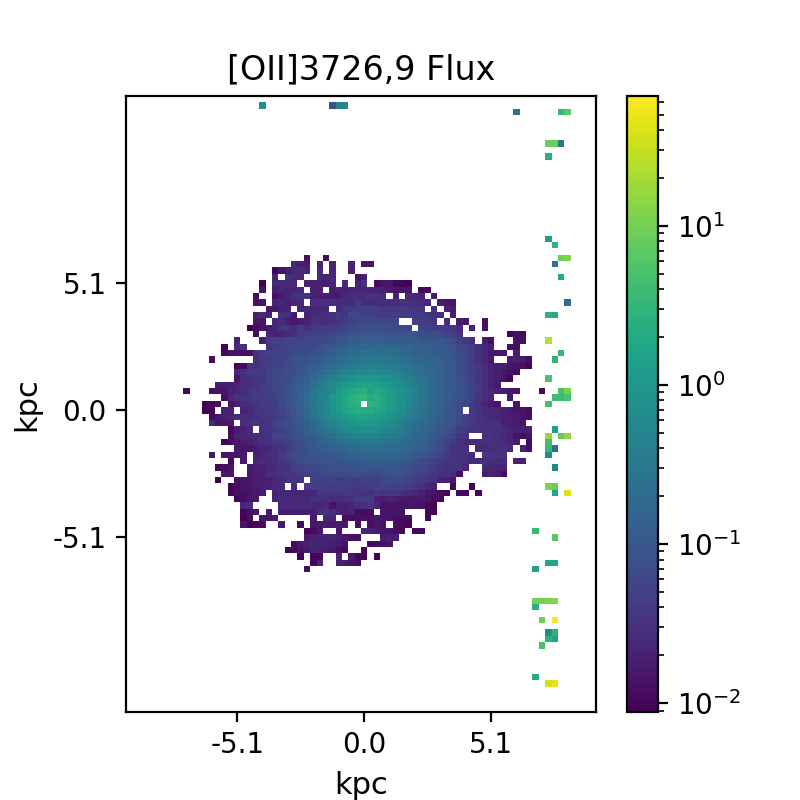

In [17]:
%matplotlib notebook
o2 = flux_map(5, ftot, err_ftot, '[OII]3726,9 Flux', kpc=True)
savefig('new_OII_flux.pdf')